In [35]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
model_list = [
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
]

In [36]:
# PROMP_LIST = ["-sbs-budget-hard", "-aav", "-c2f", "-sbs", "-sbs-hard"]
PROMP_LIST = ["-sbs","-c2f","-aav","-sbs-budget","-c2f-budget","-aav-budget"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-72B-Instruct": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    "internlm/internlm2_5-1_8b-chat": "internlm",
    "internlm/internlm2_5-7b-chat": "internlm",
    "internlm/internlm2_5-20b-chat": "internlm",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "internlm": ["internlm"+prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

In [37]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
        
        return budget_list


In [38]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [39]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'Qwen/Qwen2.5-14B-Instruct': {'qwen-sbs': [21.5,
   24.3,
   22.4,
   24.9,
   31.4,
   39.0,
   47.7,
   58.4,
   65.6,
   71.6,
   77.2,
   82.6,
   89.2,
   92.0,
   94.1,
   94.6,
   94.5,
   94.8],
  'qwen-c2f': [34.0,
   40.4,
   45.6,
   50.6,
   58.1,
   65.4,
   73.3,
   78.4,
   83.5,
   87.6,
   89.8,
   91.5,
   93.3,
   93.9,
   94.1,
   94.3,
   94.3,
   94.3],
  'qwen-aav': [31.3,
   46.3,
   58.9,
   70.0,
   78.0,
   82.8,
   86.1,
   88.6,
   89.8,
   90.4,
   91.4,
   92.6,
   93.3,
   93.4,
   93.6,
   93.6,
   93.6,
   93.6],
  'qwen-sbs-budget': [41.7,
   48.7,
   56.1,
   54.4,
   60.2,
   64.4,
   66.9,
   71.2,
   79.2,
   80.1,
   85.8,
   86.9,
   91.7,
   92.9,
   94.1,
   93.6,
   94.5,
   94.4],
  'qwen-c2f-budget': [40.0,
   48.1,
   64.7,
   68.4,
   76.2,
   80.7,
   83.5,
   86.1,
   89.2,
   90.3,
   91.4,
   92.8,
   93.2,
   93.9,
   93.8,
   93.9,
   93.9,
   94.3],
  'qwen-aav-budget': [48.1,
   64.1,
   71.3,
   75.7,
   80.3,
   84.5,
   85.4,


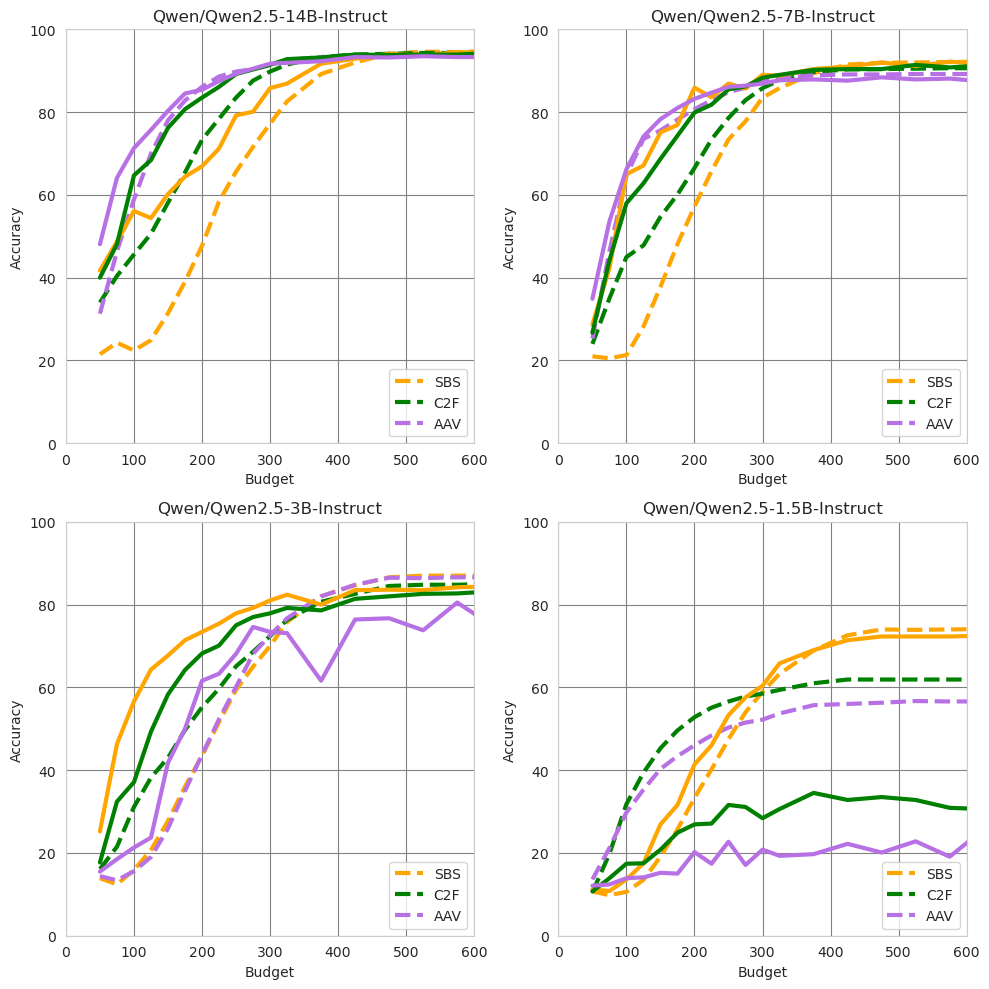

In [43]:
import seaborn as sns

# Set Seaborn style
sns.set_style(style="whitegrid", rc={"grid.linewidth": 8, "grid.color": "0.5"})

# Create figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
line_width = 3
color_list = ["orange", "green", "#B771E5"]  # Changed to list instead of set

# Convert axs to 1D array for easier indexing
axs = axs.flatten()

for idx, model in enumerate(model_list):
    for prompt_type in MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        linestyle = "-" if "budget" in prompt_type else "--"
        
        if "sbs-budget" in prompt_type:
            axs[idx].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=linestyle, color=color_list[0], linewidth=line_width)
        elif "c2f-budget" in prompt_type:
            axs[idx].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=linestyle, color=color_list[1], linewidth=line_width)
        elif "aav-budget" in prompt_type:
            axs[idx].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=linestyle, color=color_list[2], linewidth=line_width)
        elif "sbs" in prompt_type:
            axs[idx].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=linestyle, color=color_list[0], linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[idx].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=linestyle, color=color_list[1], linewidth=line_width)
        elif "aav" in prompt_type:
            axs[idx].plot(budget_list, model_acc_dicts[model][prompt_type], linestyle=linestyle, color=color_list[2], linewidth=line_width)
            
    axs[idx].set_title(model)
    axs[idx].set_xlabel("Budget")
    axs[idx].set_ylabel("Accuracy")
    axs[idx].set_ylim(0, 100)
    axs[idx].set_xlim(0, 600)
    axs[idx].grid(True)
    axs[idx].legend(["SBS", "C2F", "AAV"], loc="lower right")

plt.tight_layout()  # Add spacing between subplots
plt.savefig("review1.pdf")